<a href="https://colab.research.google.com/github/maxwellfundi/advanced_deep_learning/blob/main/J_Njiru_Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers,models, Input
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Load and preprocess the MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the image data to be between 0 and 1
x_train_mnist, x_train_mnist.reshape(-1, 28,28,1).astype('float32')/255.0
x_test_mnist, x_test_mnist.reshape(-1, 28,28,1).astype('float32')/255.0

# One-hot encode the labels
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=10)

In [33]:
# Building the CNN
def create_cnn(activation, input_shape, use_batch_norm=False):
    inputs = Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation=activation)(inputs)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64)(x)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)

    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [34]:
#training and evaluating the model

def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, learning_rate, epochs=10):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    return history


In [35]:
#plotting
def plot_comparison(histories):
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  for model_type, history in histories.items():
    train_error =[(1 - acc) * 100 for acc in history.history['accuracy']]
    val_error = [(1 - acc) * 100 for acc in history.history['val_accuracy']]
    plt.plot(train_error, label=f'{model_type} (Training)')
    plt.plot(val_error, label=f'{model_type} (Validation)')

    plt.title('Classification Error')
    plt.xlabel('Epochs')
    plt.ylabel('Miscalssification Error (%)')
    plt.legend()
    plt.grid(True)

  plt.subplot(1, 2, 2)
  for model_type, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model_type} (Training)')
    plt.plot(history.history['val_loss'], label=f'{model_type} (Validation)')

  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()


Training CNN without Batch Normalisation
Training CNN with Batch Normalisation


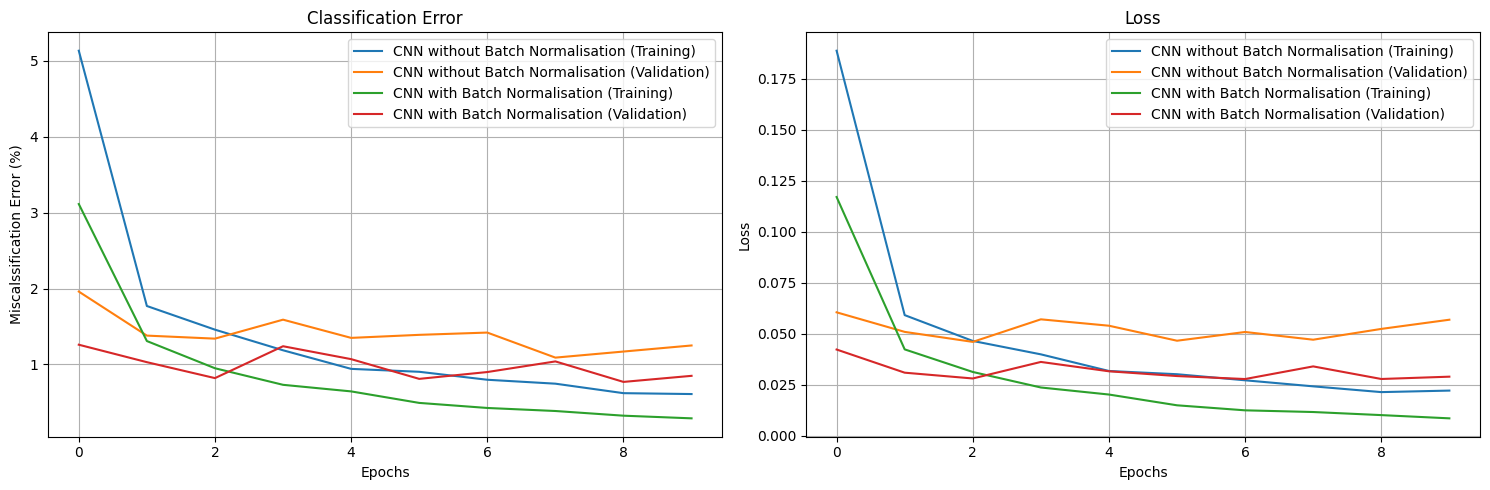

In [38]:
#setting hyper parameters
learning_rate = 0.001
epochs = 10
histories = {}

print("Training CNN without Batch Normalisation")
model_without_bn = create_cnn('relu',(28, 28, 1), use_batch_norm=False)
history_without_bn = train_and_evaluate_model(model_without_bn, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, learning_rate, epochs)
histories['CNN without Batch Normalisation'] = history_without_bn

print("Training CNN with Batch Normalisation")
model_with_bn = create_cnn('relu',(28, 28, 1), use_batch_norm=True)
history_with_bn = train_and_evaluate_model(model_with_bn, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, learning_rate, epochs)
histories['CNN with Batch Normalisation'] = history_with_bn

plot_comparison(histories)



**Quick Note and conclusions**
The CNN with Batch Normalisation achieves lower misclassification errors for both training and validation compared to the CNN without Batch Normalisation. Without Batch Normalisation, the training error starts high and drops sharply but stabilizes at a higher error rate than the network with Batch Normalisation. Additionally, the validation error without Batch Normalisation is  higher and fluctuates, indicating possible overfitting.

Loss decreases more smoothly and consistently when Batch Normalisation is applied. The CNN without Batch Normalisation starts with higher loss values and stabilizes at higher loss levels compared to the model with Batch Normalisation. The validation loss without Batch Normalisation exhibits more instability compared to the network with Batch Normalisation.

**Conclusion,** Batch Normalisation improves training stability, reduces misclassification error, and achieves lower loss. It helps the network generalize better, as evidenced by the lower validation error and loss.